In [ ]:
# https://github.com/SkoltechRobotics/rplidar

In [2]:
from rplidar import RPLidar
lidar = RPLidar('/dev/ttyUSB0')

info = lidar.get_info()
print(info)

health = lidar.get_health()
print(health)

for i, scan in enumerate(lidar.iter_scans()):
    print('%d: Got %d measurements' % (i, len(scan)))
    if i > 10:
        break

lidar.stop()
lidar.stop_motor()
lidar.disconnect()

{'model': 24, 'firmware': (1, 25), 'hardware': 5, 'serialnumber': 'A5FA9AF2C1EA98D4BEEB9CF02A293517'}
('Good', 0)
0: Got 52 measurements
1: Got 187 measurements
2: Got 196 measurements
3: Got 188 measurements
4: Got 187 measurements
5: Got 187 measurements
6: Got 188 measurements
7: Got 183 measurements
8: Got 187 measurements
9: Got 185 measurements
10: Got 186 measurements
11: Got 186 measurements


In [3]:
%matplotlib inline

In [ ]:
HTML(ani.to_html5_video())

In [18]:
lidar.stop()
lidar.disconnect()

In [72]:
import sys
import numpy as np
from rplidar import RPLidar


PORT_NAME = '/dev/ttyUSB0'


lidar = RPLidar(PORT_NAME)
data = []
for i, scan in enumerate(lidar.iter_scans()):
        data.append(np.array([(np.radians(meas[1]), meas[2]) for meas in scan]))
        if i % 100 ==0:
            print('%d: Got %d measurements' % (i, len(scan)))
        if i > 1000-1:
            break
lidar.stop()
lidar.disconnect()

0: Got 209 measurments
100: Got 227 measurements
200: Got 172 measurements
300: Got 229 measurements
400: Got 230 measurements
500: Got 232 measurements
600: Got 231 measurements
700: Got 233 measurements
800: Got 235 measurements
900: Got 235 measurements
1000: Got 231 measurements


In [73]:
max(d[:,1])

6303.0

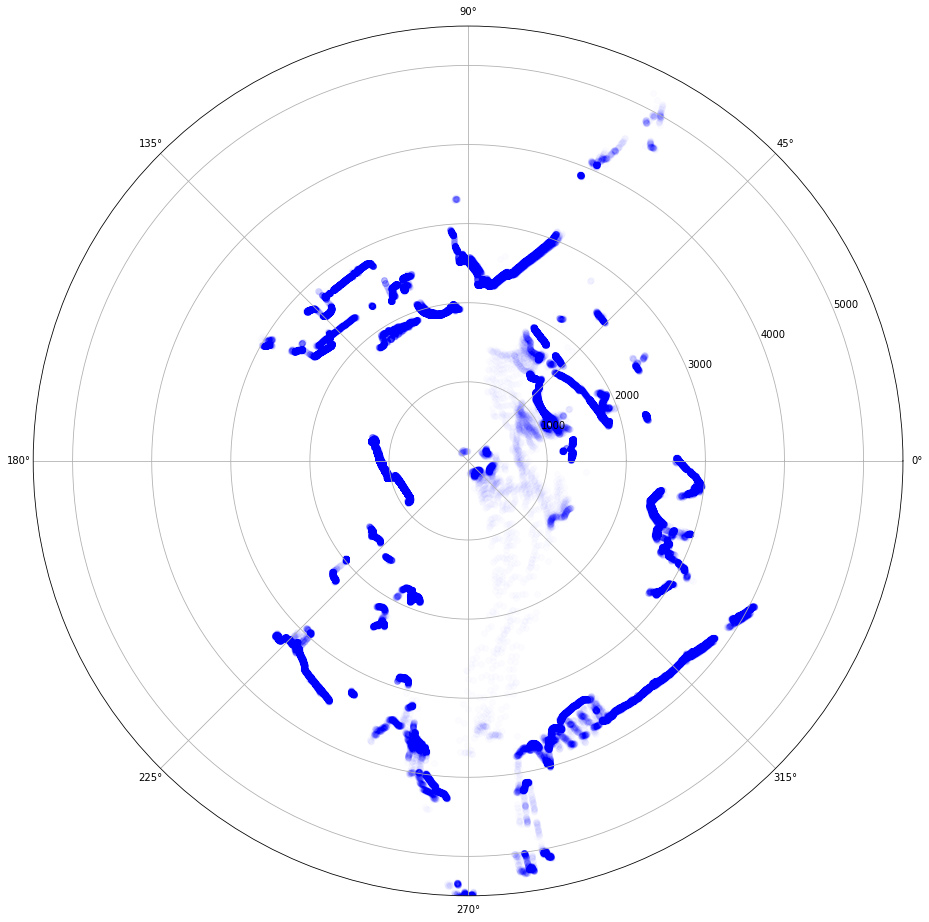

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

DMAX = max(d[:,1])
IMIN = 0
IMAX = 50

fig = plt.figure(figsize=(16,16))
ax = plt.subplot(111, projection='polar')
for d in data:
    line = ax.scatter(d[:,0], d[:,1], c='blue', alpha=0.01)
ax.set_rmax(DMAX)
ax.grid(True)
plt.show()

In [62]:
scan[:10]

[(15, 126.171875, 3761.75),
 (15, 255.875, 434.25),
 (15, 257.15625, 438.25),
 (15, 258.453125, 442.25),
 (15, 259.671875, 444.75),
 (15, 261.109375, 447.25),
 (15, 262.359375, 452.5),
 (15, 263.46875, 459.0),
 (15, 264.8125, 467.75),
 (15, 265.859375, 478.0)]